# Health Exploration and Analytics
<img src="images/healthy.jpg" alt="healthy image" style="max-height: 450px;">
<div>
    Source: 
    <a href="https://www.franchiseindia.com/content/Diagnosing-the-beauty-of-wellness-business.5948">franchiseindia</a>
</div>

## Abstract
This notebook includes analytics on many datasets about our health. We make some graphs to understand some correlations in the data. 

We focus only on three correlations:
* urban population with life expectancy
* GDP with life expectancy
* under five mortality with urban population

## General Question
How does the environment we live in influence our health?

## Data Science is OSEMN. The OSEMN Pipeline
I'll follow the OSEMN data science pipeline (pronounced "awesome). I'll skip the fourth step because I don't have the needed skills to model the data for now.
1. Obtaining the data.
2. Scrubbing (cleaning) the data. This includes detecting, correcting, removing inacurrate records from the data.
3. Exploring and visualizing our data. This will help us to find patterns and trends.
4. Modeling the data. This will give us the power to predict.
5. Interpreting the data. This includes explaining your finding through communication.

Sources: [OSEMN Pipeline](https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/), [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing)

In [1]:
%matplotlib inline

In [2]:
import functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Gapminder data, Part 1: demographics and economics
Question: **How do economical factors influence health across countries?**

Gapminder collects data related to demographics and health in all countries. The focus of this problem is to see "the big picture" - how health differs among countries and what possible factors can contribute to this (i.e. air quality, nutrition, spending on healthcare, crime, etc.). In this problem, we'll narrow down our scope to several factors. 

Use the downloaded datasets from the data/1. EconomicsAndDemographics folder
* life_expectancy_at_birth.xlsx
* under_five_mortality_rate.xlsx
* urban_population_pct.xlsx
* gdp_per_capita.xlsx
* agriculture_gdp_pct.xlsx, industry_gdp_pct.xlsx, services_gdp_pct.xlsx
* total_health_expenditure_gdp_pct.xlsx
* water_withdrawal_per_capita.xlsx
* coal_consumption_per_capita.xlsx
* carbon_dioxide_emissions_per_capita.xlsx
* electricity_consumption_per_capita.xlsx
* suicide_per_10k.xlsx

Datasets source: [Gapmidner](http://www.gapminder.org/data/)

Each dataset is described well in the "About" worksheet. Note that there are a lot of missing data points.
The datasets in point 5 correspond to the three main economic sectors. You might combine them into one table (before you start work) if you wish.

Explore how all variables change by country and over time. Create plots as needed. Make draw conclusions.

### Datasets Details
Let's see more information about each dataset. The first bullet will be the description of the dataset. The second one will be the years which have information for **Bulgaria**. I'll make exploration and Analytics mostly on Bulgaria, so I need to see how many info is there in the datasets for this country.

* life_expectancy_at_birth.xlsx 
    * The average number of years a newborn child would live if current mortality patterns were to stay the same.
    * **1800 - 2016**


* under_five_mortality_rate.xlsx
    * The probability that children born in a specific year will die before reaching the age of five, if the age-specific mortality rates remain the same. Expressed as a rate per 1,000 live births.
    * ** 1962 - 2011**
    
    
* urban_population_pct.xlsx
    * Urban population (% of total)
    * **1960 - 2011**
    
    
* gdp_per_capita.xlsx
    * Gross Domestic Product per capita by Purchasing Power Parities (in international dollars, fixed 2011 prices). The inflation and differences in the cost of living between countries have been taken into account.
    * **1800 - 2015**

---
* agriculture_gdp_pct.xlsx 
    * Agriculture, value added (% of GDP). Agriculture corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production.
    * **1980 - 2011**


* industry_gdp_pct.xlsx 
    * Industry, value added (% of GDP). Industry corresponds to ISIC divisions 10-45 and includes manufacturing (ISIC divisions 15-37). It comprises value added in mining, manufacturing (also reported as a separate subgroup), construction, electricity, water, and gas. 
    * **1980 - 2010**


* services_gdp_pct.xlsx
    * Services, etc., value added (% of GDP). Services correspond to ISIC divisions 50-99 and they include value added in wholesale and retail trade (including hotels and restaurants), transport, and government, financial, professional, and personal services such as education, health care, and real estate services.
    * **1980 - 2010**
---

* total_health_expenditure_gdp_pct.xlsx 
    * Total expenditure on health as percentage of gross domestic product
    * **1995-2010**
    
    
* water_withdrawal_per_capita.xlsx
    * Total water withdrawal per capita (m<sup>3</sup>/inhab/yr)
    * **1982; 1992; 2002 !!!**


* coal_consumption_per_capita.xlsx
    * Coal Consumption per person (tonnes oil equivalent)
    * **1965 - 2011**


* carbon_dioxide_emissions_per_capita.xlsx
    * Average CO2 emission in metric tons per person during the given year, calculated from deviding the total CO2 with the total population of the countries.
    * ** 1881 - 2012 **


* electricity_consumption_per_capita.xlsx
    * Electricity consumption, per capita (kWh)
    * **1971 - 2011**
    

* suicide_per_10k.xlsx
    * Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted
    * **1964 - 2005**

### Datasets Choice
I'll load all datasets except these two:
* suicide_per_10k.xlsx
* water_withdrawal_per_capita.xlsx

### Part 1: Obtaining the Data

In [3]:
economics_and_demographics_data_folder = "data/1. EconomicsAndDemographics"

In [4]:
def load_dataset(name):
    dataset = pd.read_excel(economics_and_demographics_data_folder + "/" + name + ".xlsx")
    return dataset

#### The Life Expectancy at Birth Dataset

In [5]:
life_expectancy_data = load_dataset("life_expectancy_at_birth")
life_expectancy_data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


#### The Under Five Mortality Dataset

In [6]:
# TODO: rename me to under_five_mortality_data
under_five_moratlity_data = load_dataset("under_five_mortality_rate")
under_five_moratlity_data.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


#### The Urban Population Dataset

In [7]:
urban_population_data = load_dataset("urban_population_pct")
urban_population_data.head()

,Urban population (% of total),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,8.0,8.2650,8.5370,8.8090,9.0810,9.353,9.6886,10.0242,10.3598,...,21.1026,21.3624,21.6222,21.882,22.1534,22.4248,22.6962,22.9676,23.239,23.5472
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.7,30.8100,30.9150,31.0200,31.1250,31.230,31.3320,31.4340,31.5360,...,43.7662,44.7788,45.7914,46.804,47.9076,49.0112,50.1148,51.2184,52.322,53.3846
4,Algeria,30.5,31.9366,33.3632,34.7898,36.2164,37.643,38.0144,38.3858,38.7572,...,63.1478,64.3282,65.5086,66.689,67.7560,68.8230,69.8900,70.9570,72.024,72.8650


#### The Gross Domestic Product Dataset

In [8]:
gross_domestic_product_data = load_dataset("gdp_per_capita")
gross_domestic_product_data.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


#### The Agriculture Dataset

In [9]:
agriculture_data = load_dataset("agriculture_gdp_pct")
agriculture_data.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


#### The Industry Dataset

In [10]:
industry_data = load_dataset("industry_gdp_pct")
industry_data.head()

,"Industry, value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The Services Dataset

In [11]:
services_data = load_dataset("services_gdp_pct")
services_data.head()

,"Services, etc., value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The Total Health Expenditure Dataset

In [12]:
total_health_expenditure_data = load_dataset("total_health_expenditure_gdp_pct")
total_health_expenditure_data.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


#### The Coal Consumption Dataset

In [13]:
coal_consumption_data = load_dataset("coal_consumption_per_capita")
coal_consumption_data.head()

,Coal Consumption per person (tonnes oil equivalent),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.005871,0.00556,0.004136,0.004249,0.005248,0.006038,0.002118,0.002055,0.001993,...,0.019019,0.01877,0.018737,0.016784,0.017459,0.017047,0.016789,0.005494,NaN,NaN


#### The Carbon Dioxide Emissions Dataset

In [14]:
carbon_dioxide_data = load_dataset("carbon_dioxide_emissions_per_capita")
carbon_dioxide_data.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


#### The Electricity Consumption Dataset

In [15]:
electricity_consumption_data = load_dataset("electricity_consumption_per_capita")
electricity_consumption_data.head()

,"Electricity consumption, per capita (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1459.433092,1378.656751,1691.749604,1622.587317,1146.694855,1137.949266,1510.482138,1706.976899,1800.870627,2021.634918
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.702866,768.798600,785.622933,869.352620,840.780713,870.586163,920.914005,841.320010,986.865004,1090.565936


### Part 2: Scrubbing the Data

We can see that all datasets have same structure. Also, we can see that all datasets are messy. To make them tidy we have to have only three columns for each dataset: "country", "year", "value_name". I'll write a reusable function for that task.

In [16]:
def tidy_dataset(dataset, value_name):
    dataset = dataset.rename(columns = {dataset.columns[0] : "country"})
    dataset = pd.melt(dataset, id_vars = ["country"], var_name = "year", value_name = value_name)
    dataset.year = dataset.year.astype(np.int)
    return dataset

Now, we have a function which can tidy our datasets. Let's tidy them!

#### The Life Expectancy at Birth Dataset

In [17]:
life_expectancy_data = tidy_dataset(life_expectancy_data, "life_expectancy")
print(life_expectancy_data.columns.values)

['country' 'year' 'life_expectancy']


In [18]:
life_expectancy_data.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


#### The Under Five Mortality Dataset

In [19]:
under_five_moratlity_data = tidy_dataset(under_five_moratlity_data, "under_five_mortality")
print(under_five_moratlity_data.columns.values)

['country' 'year' 'under_five_mortality']


In [20]:
under_five_moratlity_data.head()

,country,year,under_five_mortality
0,Afghanistan,1931,NaN
1,Albania,1931,NaN
2,Algeria,1931,NaN
3,Andorra,1931,NaN
4,Angola,1931,NaN


#### The Urban Population Dataset

In [21]:
urban_population_data = tidy_dataset(urban_population_data, "urban_population")
print(urban_population_data.columns.values)

['country' 'year' 'urban_population']


In [22]:
urban_population_data.head()

,country,year,urban_population
0,Abkhazia,1960,NaN
1,Afghanistan,1960,8.0
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,30.7
4,Algeria,1960,30.5


#### The Gross Domestic Product Dataset

In [23]:
gross_domestic_product_data = tidy_dataset(gross_domestic_product_data, "gdp")
print(gross_domestic_product_data.columns.values)

['country' 'year' 'gdp']


In [24]:
gross_domestic_product_data.head()

,country,year,gdp
0,Abkhazia,1800,NaN
1,Afghanistan,1800,603.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,667.0
4,Algeria,1800,716.0


#### The Agriculture Dataset

In [25]:
agriculture_data = tidy_dataset(agriculture_data, "agriculture")
print(agriculture_data.columns.values)
agriculture_data.head()

['country' 'year' 'agriculture']


,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


#### The Industry Dataset

In [26]:
industry_data = tidy_dataset(industry_data, "industry")
print(industry_data.columns.values)

['country' 'year' 'industry']


In [27]:
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


#### The Services Dataset

In [28]:
services_data = tidy_dataset(services_data, "services")
print(services_data.columns.values)

['country' 'year' 'services']


In [29]:
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


#### The Total Health Expenditure Dataset

In [30]:
total_health_expenditure_data = tidy_dataset(total_health_expenditure_data, "health_expenditure")
print(total_health_expenditure_data.columns.values)

['country' 'year' 'health_expenditure']


In [31]:
total_health_expenditure_data.head()

,country,year,health_expenditure
0,Abkhazia,1995,NaN
1,Afghanistan,1995,NaN
2,Akrotiri and Dhekelia,1995,NaN
3,Albania,1995,2.559558
4,Algeria,1995,4.173543


#### The Coal Consumption Dataset

In [32]:
coal_consumption_data = tidy_dataset(coal_consumption_data, "coal_consumption")
print(coal_consumption_data.columns.values)

['country' 'year' 'coal_consumption']


In [33]:
coal_consumption_data.head()

,country,year,coal_consumption
0,Abkhazia,1965,NaN
1,Afghanistan,1965,NaN
2,Akrotiri and Dhekelia,1965,NaN
3,Albania,1965,NaN
4,Algeria,1965,0.005871


#### The Carbon Dioxide Emissions Dataset

In [34]:
carbon_dioxide_data = tidy_dataset(carbon_dioxide_data, "carbon_dioxide")
print(carbon_dioxide_data.columns.values)

['country' 'year' 'carbon_dioxide']


In [35]:
carbon_dioxide_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


In [36]:
carbon_dioxide_data[(carbon_dioxide_data.country == "Bulgaria") & (carbon_dioxide_data.year == 1957)]

,country,year,carbon_dioxide
46327,Bulgaria,1957,1.884606


#### The Electricity Consumption Dataset

In [37]:
electricity_consumption_data = tidy_dataset(electricity_consumption_data, "electricity_consumption")
print(electricity_consumption_data.columns.values)

['country' 'year' 'electricity_consumption']


In [38]:
electricity_consumption_data.head()

,country,year,electricity_consumption
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,NaN


#### Combining the Datasets
Now is time to combine all the datasets in one. If we have one dataset, we'll make easier our work with the data.

In [39]:
datasets = [
    life_expectancy_data,
    under_five_moratlity_data,
    urban_population_data,
    gross_domestic_product_data,
    agriculture_data,
    industry_data,
    services_data,
    total_health_expenditure_data,
    coal_consumption_data,
    carbon_dioxide_data,
    electricity_consumption_data
]

data = functools.reduce(lambda left, right: pd.merge(left, right, on = ["country", "year"]), datasets)

In [40]:
data.head()

,country,year,life_expectancy,under_five_mortality,urban_population,gdp,agriculture,industry,services,health_expenditure,coal_consumption,carbon_dioxide,electricity_consumption
0,Afghanistan,1995,49.4,158.0,19.341,872.0,NaN,NaN,NaN,NaN,NaN,0.064107,NaN
1,Albania,1995,73.7,34.6,38.911,3941.0,55.812145,22.497942,21.689914,2.559558,NaN,0.664204,612.592909
2,Algeria,1995,71.6,54.8,55.997,9168.0,10.497818,50.400574,39.101608,4.173543,0.020253,3.346731,549.266440
3,American Samoa,1995,70.6,NaN,85.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,1995,82.6,6.4,93.661,26143.0,NaN,NaN,NaN,7.644394,NaN,6.290669,NaN


Now we have the data organized. I'll want to add more detailed information for each column of the combined dataset.

| Column                  | Description                                                                                                                                                                                                                                                                                          |
| :- | :- |
| country                 | country                                                                                                                                                                                                                                                                                              | 
| year                    | year                                                                                                                                                                                                                                                                                                 |
| life_expectancy         | The average number of years a newborn child would live if current mortality patterns were to stay the same.                                                                                                                                                                                          |
| under_five_morality     | Under-five mortality rate (per 1000 live births). The probability that children born in a specific year will die before reaching the age of five; if the age-specific mortality rates remain the same. Expressed as a rate per 1000 live births.                                                     |
| urban_population        | Urban population (% of total).                                                                                                                                                                                                                                                                       |
| gdp                     | Gross Domestic Product per capita by Purchasing Power Parities (in international dollars; fixed 2011 prices). The inflation and differences in the cost of living between countries has been taken into account.                                                                                     |
| agriculture             | Agriculture; value added (% of GDP)                                                                                                                                                                                                                                                                  |
| industry                | Industry; value added (% of GDP)                                                                                                                                                                                                                                                                     |
| services                | Services; etc.; value added (% of GDP)                                                                                                                                                                                                                                                               |
| health_expenditure      | Total expenditure on health as percentage of GDP                                                                                                                                                                                                                                                     |
| coal_consumption        | Coal Consumption per person (tonnes oil equivalent)                                                                                                                                                                                                                                                  |
| carbon_dioxide          | Average CO2 emission in metric tons per person during the given year; calculated from deviding the total CO2 with the total population of the countries.                                                                                                                                             |
| electricity_consumption | Per capita consumption of electricity during the given year; counted in kilowatt-hours (kWh). Electric power consumption measures the production of power plants and combined heat and power plants less transmission; distribution; and transformation losses and own use by heat and power plants. |

Of course, you can find more information in the "About" worksheet in each Excel file.

### Part 3: Exploring the Data

In [41]:
# This dataset containt 3200 rows (observations) and 13 columns (features)
data.shape

(3200, 13)

Let's see the type of each column and the count of non-null values in our data.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 0 to 3199
Data columns (total 13 columns):
country                    3200 non-null object
year                       3200 non-null int32
life_expectancy            3024 non-null float64
under_five_mortality       2880 non-null float64
urban_population           3152 non-null float64
gdp                        3008 non-null float64
agriculture                2524 non-null float64
industry                   2541 non-null float64
services                   2524 non-null float64
health_expenditure         2832 non-null float64
coal_consumption           877 non-null float64
carbon_dioxide             2981 non-null float64
electricity_consumption    2054 non-null float64
dtypes: float64(11), int32(1), object(1)
memory usage: 337.5+ KB


TODO: (optional): why coal_consumption has the most missing data? Which are the missing years?

The types are correct. We can also see that the most missing data is for the **coal_consumption** column.
However, I'll remove all null values for each column in order to work with tidy data.

In [43]:
# TODO: see the shape after the drop
data = data.dropna()
print(data.isnull().values.any())

False


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 2 to 3196
Data columns (total 13 columns):
country                    811 non-null object
year                       811 non-null int32
life_expectancy            811 non-null float64
under_five_mortality       811 non-null float64
urban_population           811 non-null float64
gdp                        811 non-null float64
agriculture                811 non-null float64
industry                   811 non-null float64
services                   811 non-null float64
health_expenditure         811 non-null float64
coal_consumption           811 non-null float64
carbon_dioxide             811 non-null float64
electricity_consumption    811 non-null float64
dtypes: float64(11), int32(1), object(1)
memory usage: 85.5+ KB


Let's see for which countries we have information

In [45]:
data.country.unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Colombia', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Hungary', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Italy', 'Japan', 'Kazakhstan', 'Lithuania', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovak Republic', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Kingdom',
       'United States', 'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=object)

#### Correlation Matrix for All Countries
Okay. Let's see the correlation between all features for all countries.

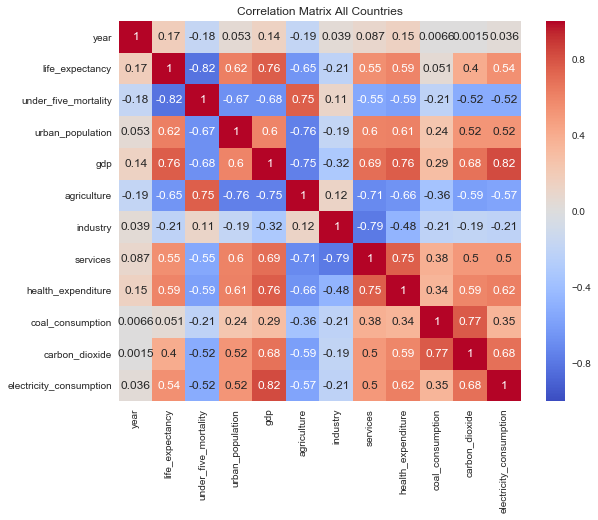

In [46]:
correlation = data.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(correlation, cmap = "coolwarm", annot = True)
plt.title("Correlation Matrix All Countries")
plt.show()

##### Bulgaria

In [47]:
grouped_by_country = data.groupby("country")

In [48]:
def plot_correlation_matrix(country):
    country_data = grouped_by_country.get_group(country)
    country_correlation = country_data.corr()
    plt.figure(figsize = (9, 7))
    sns.heatmap(country_correlation, cmap = "coolwarm", annot = True)
    plt.title(country + " Correlation Matrix")
    plt.show()

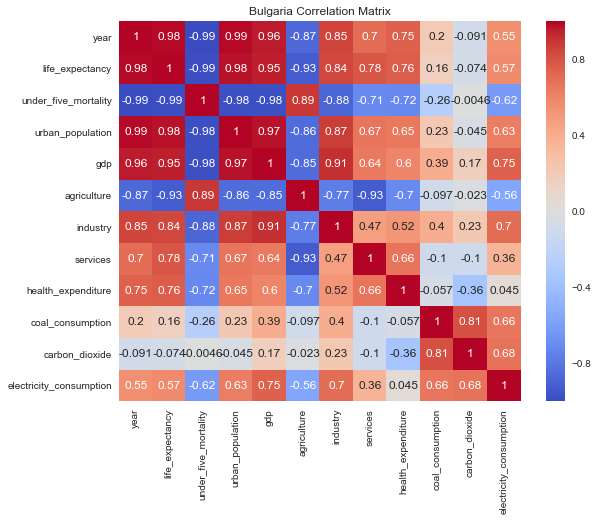

In [49]:
plot_correlation_matrix("Bulgaria")

I'll focus on some interesting correlations for me.

Positive Correlated Features:
* life_expectancy with urban_population correlation is: **0.98**
* life_expectancy with gdp correlation is: **0.95**

Negative Correlated Features:
* life_expectancy with under_five_mortality correlation is: **-0.99**
* under_five_mortality with urban_population correlation is: **-0.98**
* under_five_mortality with gdp correlation is: **-0.98**
* under_five_mortality with health_expenditure correlation is: **-0.72**

Summary:

* From the positive correlations we can assume that:
    * Years with more urban population correspond to higher life expectancy
    * Years with high GDP correspond to higher life expectancy
* From the negative correlation we can assume that:
    * people which live more in urban areas have more chance to stay alive
    * If the GDP is high, the probability that children will die before reaching the age of five is less.
    * If we spend more money on health, we will have less "under five mortality"

TODO: Fix the wrong negative correlation assumptions: 
* people which live more in urban areas have more chance to stay alive -> it's not grouped like this. Years with higher urban population -> less under five mortality rate
* If we spend more money on health, we will have less "under five mortality" -> Implies causation; just state what you saw, e.g. "In the analyzed years, spending money on health corresponded to lower under five mortality rate". Add a note that this DOES NOT imply causation; e.g. that there are many factors involved. Also, if we look at the really strong correlation between life_expectancy and under_five_mortality, we can finally conclude that this just repeats the top point: "economics influences everything"

**Correlation does not imply causation**
![correlation image](https://imgs.xkcd.com/comics/correlation.png)

Hypotheses
* Is there a significant difference in the mean of **life expectancy** in countries with low vs high **urban population**?
* Is there a significant difference in the mean of **life expectancy** in countries with low vs high **GDP (Gross Domestic Product)**?
* Is there a significant difference in the mean of **"under five mortality"** in countries with low vs high **urban population**?

#### Life expectancy vs Urban Population

In [50]:
selected_countries = ["Bulgaria", "Russia", "Romania", "United States", "United Kingdom", "Portugal"]

In [51]:
def scatter_plot(countries, x_column, y_column, legend = False):
    colors = cm.rainbow(np.linspace(0, 1, len(countries)))
    for country, color in zip(countries, colors):
        country_data = data[data.country == country]
        plt.scatter(country_data[x_column], country_data[y_column], label = country, color = color)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    if legend:
        plt.legend()
    plt.show()

It seems that there's a positive correlation between the life expectancy and the urban population.

They're 2 countries that don't follow the trend: **Russia** and **Romania**. But let's see the correlation for all countries, to get more info about the global trend.

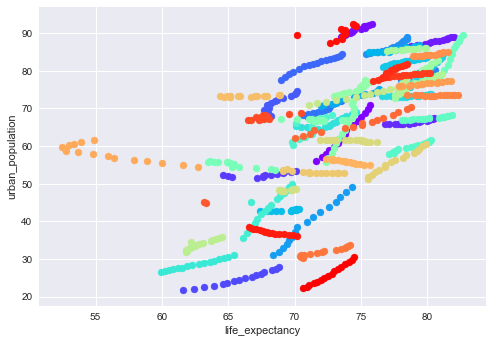

In [52]:
all_countries = data.country.unique()
scatter_plot(all_countries, "life_expectancy", "urban_population")

Well, it seems that the correlation is positive.

We can plot the mean life expectancy and the mean urban population percentage to get a more clear graph.

In [53]:
def scatter_plot_mean_values(countries, x_column, y_column, legend = False):
    colors = cm.rainbow(np.linspace(0, 1, len(countries)))
    for country, color in zip(countries, colors):
        country_data = data[data.country == country]
        plt.scatter(country_data[x_column].mean(), country_data[y_column].mean(), label = country, color = color)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    if legend:
        plt.legend()
    plt.show()

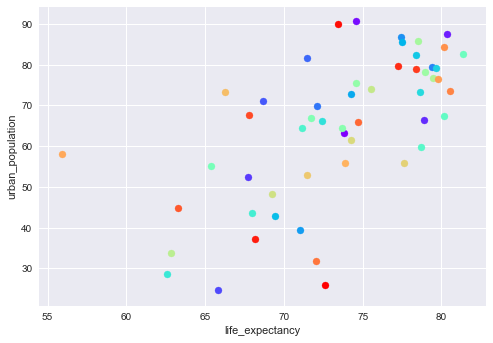

In [54]:
scatter_plot_mean_values(all_countries, "life_expectancy", "urban_population")

We can also see the correlation for some countries individually.

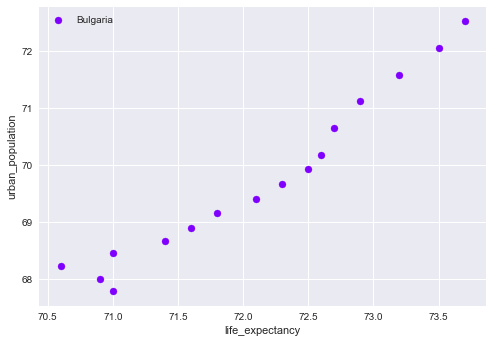

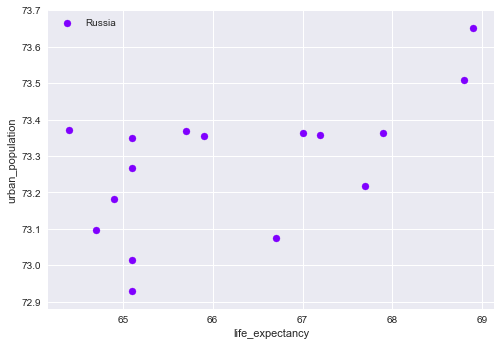

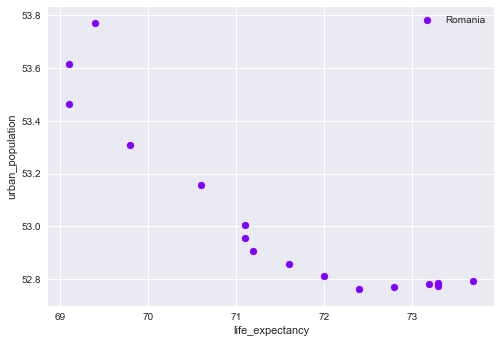

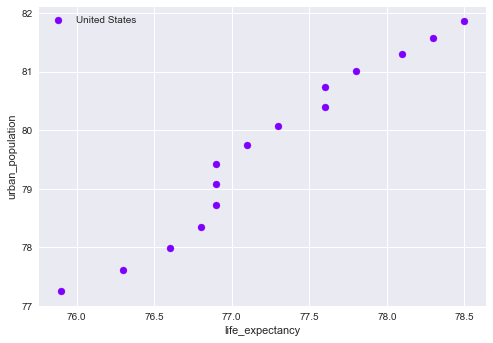

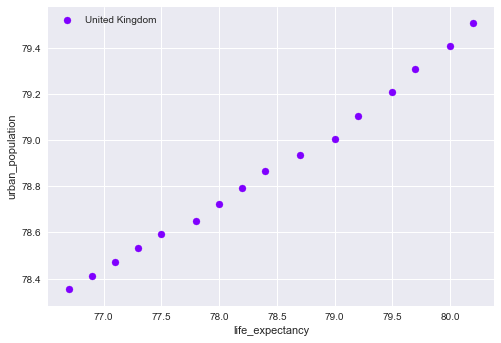

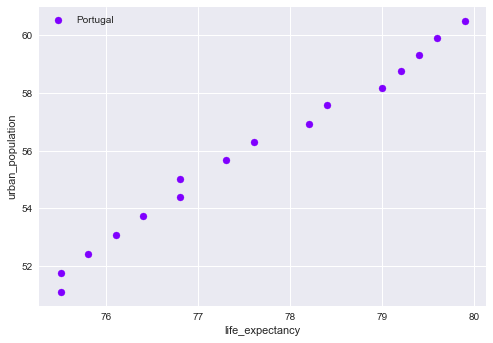

In [55]:
for country in selected_countries:
    scatter_plot([country], "life_expectancy", "urban_population", legend = True)

What about the Pearson product-moment correlation coefficients?

In [56]:
data.life_expectancy.corr(data.urban_population)

0.6233266906536058

We can also see the "urban population" mean value for both: countries with low vs high life expectancy.

In [57]:
good_life_expectancy = 75

low_life_expectancy = data[data.life_expectancy < good_life_expectancy]
high_life_expectancy = data[data.life_expectancy >= good_life_expectancy]

In [58]:
print("low life expectancy, urban population mean:", low_life_expectancy.urban_population.mean())
print("high life expectancy, urban population mean:", high_life_expectancy.urban_population.mean())

low life expectancy, urban population mean: 55.67389977827048
high life expectancy, urban population mean: 76.33098277777776


From the graphs above we say that we have global trend: if we have more urban population, we have more high live expectancy.

We have relative positive Pearson coefficient.

Also, we can see the mean values for cuntries
* with **low** life expectancy have **less** urban population
* with **high** life expectancy have **more** urban population

So, we can assume that these 2 features are correlated.

#### Life expectancy vs GDP

Let's see the correlation between the life expectancy and GDP.

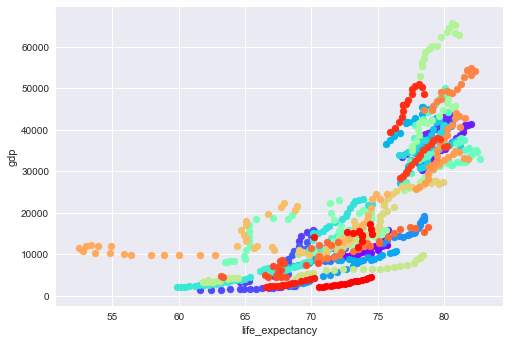

In [59]:
scatter_plot(all_countries, "life_expectancy", "gdp")

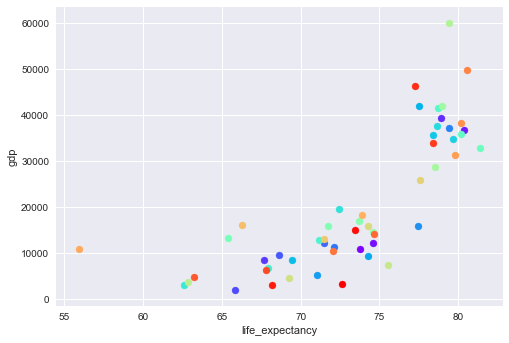

In [60]:
scatter_plot_mean_values(all_countries, "life_expectancy", "gdp")

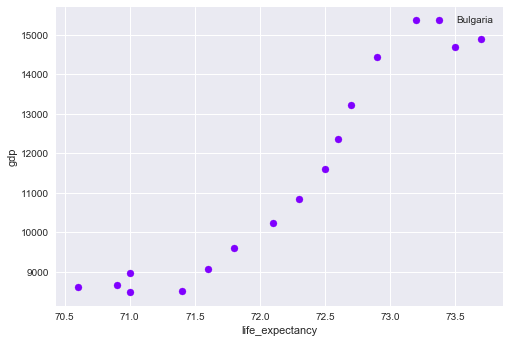

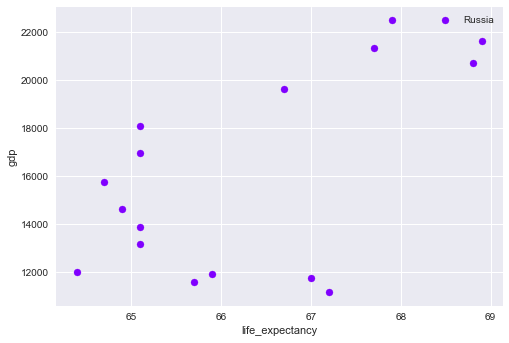

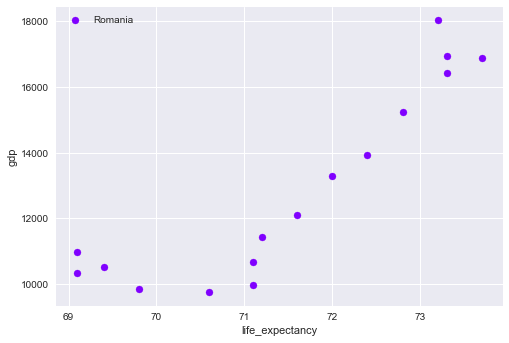

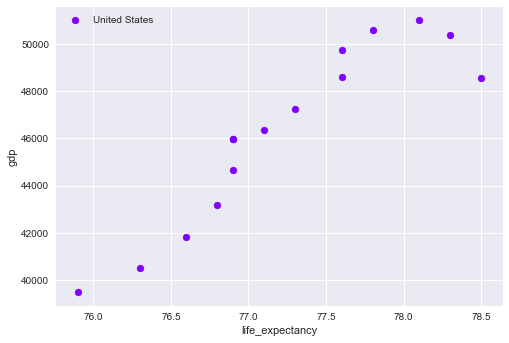

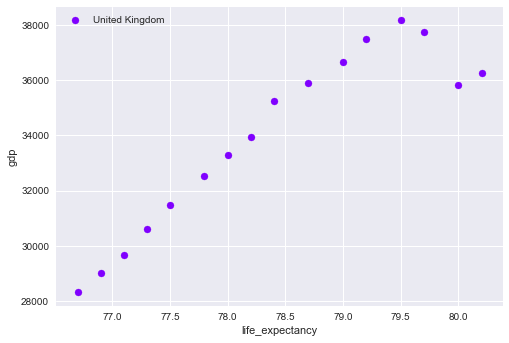

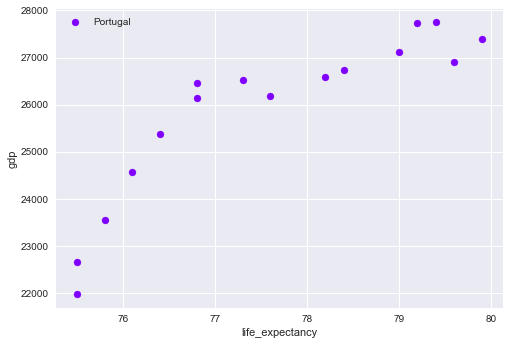

In [61]:
.for country in selected_countries:
    scatter_plot([country], "life_expectancy", "gdp", legend = True)

In [62]:
data.life_expectancy.corr(data.gdp)

0.76376324991052746

In [63]:
print("low life expectancy, GDP mean:", low_life_expectancy.gdp.mean())
print("high life expectancy, GDP mean:", high_life_expectancy.gdp.mean())

low life expectancy, GDP mean: 9931.90022172949
high life expectancy, GDP mean: 33941.96111111111


From the graphs and calcualtion above, we can assume that these features are highly correlated. 

We have high Pearson coeffiecent between these 2 features.

Also, we can see the gdp mean values for both countries with high and low life expectancy. The're very different.

#### Under Five Mortality vs Urban Population

Let's see the global correlation trend for these 2 features.

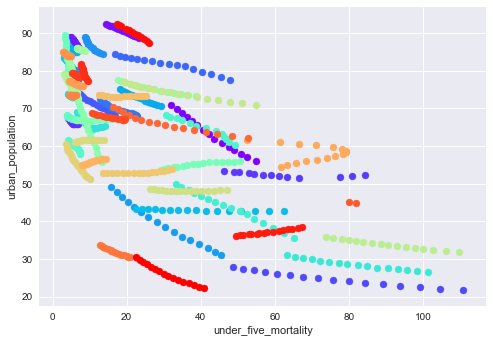

In [64]:
all_countries = data.country.unique()
scatter_plot(all_countries, "under_five_mortality", "urban_population")

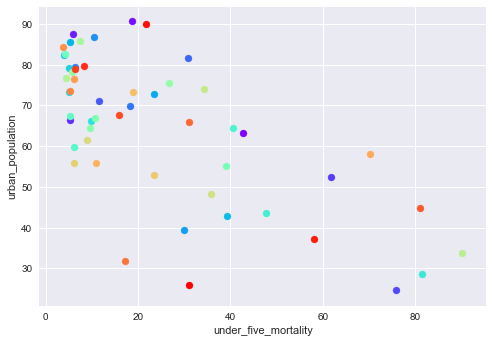

In [65]:
scatter_plot_mean_values(all_countries, "under_five_mortality", "urban_population")

The global trend is that: if we have small "under_five_mortality" we have high percentage of the urban population.

We can also see the correlation for some countries individually.

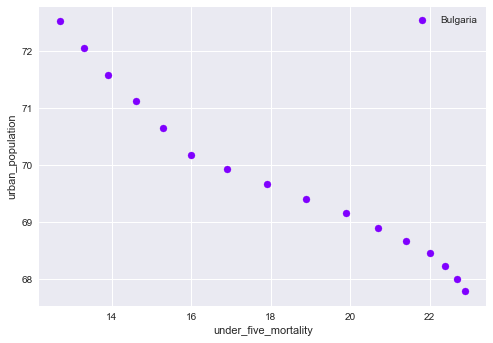

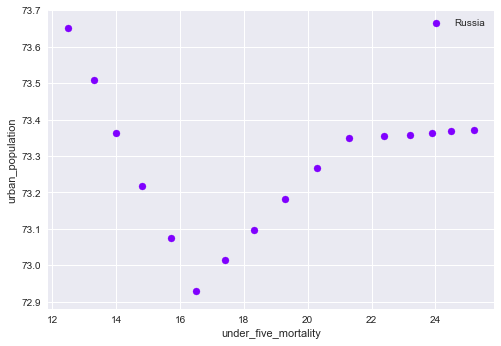

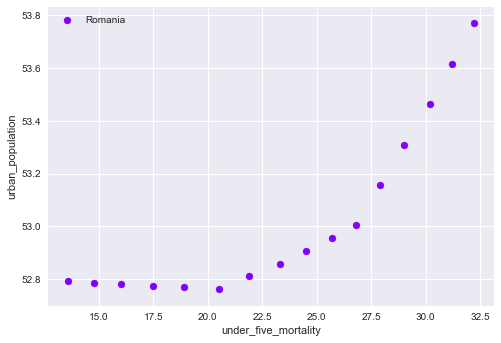

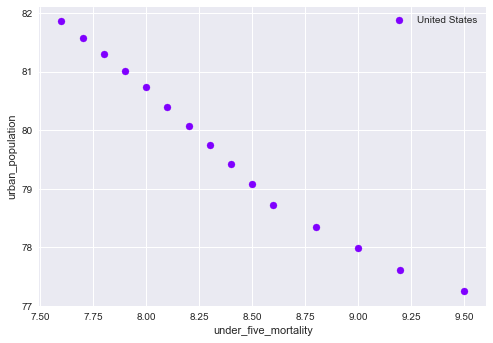

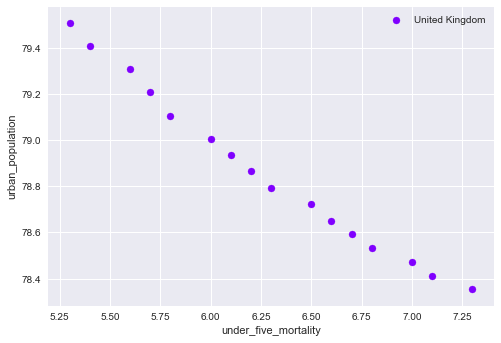

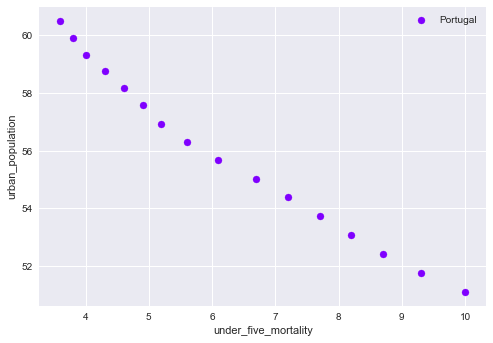

In [66]:
for country in selected_countries:
    scatter_plot([country], "under_five_mortality", "urban_population", legend = True)

In [67]:
selected_countries_data = data[data.country.isin(selected_countries)]
selected_grouped_by_country = selected_countries_data.groupby("country")
selected_grouped_by_country[["urban_population", "under_five_mortality"]].mean()

,urban_population,under_five_mortality
country,,
Bulgaria,69.769250,18.218750
Portugal,55.919688,6.243750
Romania,53.032063,23.375000
Russia,73.279500,18.912500
United Kingdom,78.867063,6.275000
United States,79.675733,8.373333


TODOs:
* Eastern countries have 3-4 times higher mortality rate, compared to western countries (only from the selected_countries).
* Portugal and Romania have a similar urban population percentage but a very different under five mortality rate. => maybe the economy changed drastically.

This time have strange individually graphs for some countries. But if we look at the all countries we can see the global trend. 

Let's see the Pearson product-moment correlation coefficients.

In [68]:
data.urban_population.corr(data.under_five_mortality)

-0.67375062627012339

I think that countries with low "under five mortality" have more urban population because of the global trend and the Pearson coefficients.

### Part 5: Interpreting the Data

From all the graphs and calcuation I think that we can assume:
* countries with more urban population have more high life expectancy
* countries with more GDP have more high life expectancy
* countries with low "under five mortality" have more high urban population percentage

TODOs
* make animations with plot.ly
* make hypothesis testing?
* explore more the data
* update the "dataset choice" section (add details for the choice)